<a href="https://colab.research.google.com/github/sing9424/dataScience/blob/main/%EC%84%9C%EC%9A%B8%EC%8B%9CCCTV%EC%9D%B8%EA%B5%AC%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 : 서울시 구별 CCTV 대수 + 서울시 구별 인구수(전체, 한국인, 외국인, 65세이상고령자)

## 목적 : 데이터 분석

In [ ]:
# 한글폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# matplotlib 나눔바른고딕체로 변경
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

## 폰트설치 후 반드시 재시작!!

In [ ]:
 # 데이터 파일을 가져오기 위해 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CCTV csv, xlsx파일 가져오기
csvPath = '/content/drive/MyDrive/Colab Notebooks/DataScience/pandas/DataScience/data/01. CCTV_in_Seoul.csv'
xlsxPath = '/content/drive/MyDrive/Colab Notebooks/DataScience/pandas/DataScience/data/01. population_in_Seoul.xls'

import pandas as pd
import numpy as np

cctv_seoul = pd.read_csv(csvPath, encoding='utf-8')

# info(), describe(), head(), tail()
cctv_seoul.info()

# 1. info() : dtype은 DataFrame인걸 알 수 있음 (null 유무 등)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기관명        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [ ]:
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [ ]:
# cctv_seoul의 수치형데이터 int64, float64 데이터의 통계를 보여준다.
cctv_seoul.describe()

,소계,2013년도 이전,2014년,2015년,2016년
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1179.080000,764.760000,159.480000,205.200000,385.880000
std,556.728983,415.510257,104.132976,137.877059,182.479981
min,485.000000,238.000000,21.000000,30.000000,81.000000
25%,748.000000,464.000000,78.000000,103.000000,292.000000
50%,1015.000000,573.000000,142.000000,184.000000,377.000000
75%,1496.000000,1070.000000,218.000000,269.000000,467.000000
max,2780.000000,1843.000000,430.000000,584.000000,932.000000


In [ ]:
# 컬럼명 '기관명' -> '구별'
cctv_seoul.rename(columns={'기관명':'구별'}, inplace=True) # 키값은 변경이전, 벨류값은 변경 이후
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [ ]:
cctv_seoul['최근증가율'] = (cctv_seoul['2016년'] + cctv_seoul['2015년'] + cctv_seoul['2014년']) / cctv_seoul['2013년도 이전'] * 100

cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [ ]:
# 데이터에 질문을 던지자!!
# CCTV 대수가 가장 많은 구는 어디? 가장 적은 구는 어디?
# 소계를 기준으로 가장 많은 구 5개, 적은 구 5개 -> 정렬

# 많은 구 5개
cctv_seoul.sort_values(by='소계', ascending=False).head() # False : 내림차순

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
18,양천구,2034,1843,142,30,467,34.671731
14,서초구,1930,1406,157,336,398,63.371266
21,은평구,1873,1138,224,278,468,85.237258
20,용산구,1624,1368,218,112,398,53.216374


In [ ]:
# 적은 구 5개
cctv_seoul.sort_values(by='소계', ascending=True).head() # True : 오름차순

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
17,송파구,618,529,21,68,463,104.347826
24,중랑구,660,509,121,177,109,79.960707
23,중구,671,413,190,72,348,147.699758


In [ ]:
# 질문: 최근증가율이 가장 높은 5구, 가장 적은 5구

# 가장 높은구
cctv_seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [ ]:
# 가장 낮은 구

cctv_seoul.sort_values(by='최근증가율', ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
18,양천구,2034,1843,142,30,467,34.671731
13,서대문구,962,844,50,68,292,48.578199
20,용산구,1624,1368,218,112,398,53.216374
5,광진구,707,573,78,53,174,53.228621
14,서초구,1930,1406,157,336,398,63.371266


In [ ]:
# cctv_seoul에서 '2013년도 이전', '2014년', '2015년', '2016년' 컬럼을 삭제
cctv_seoul.drop(['2013년도 이전', '2014년', '2015년', '2016년'], axis=1, inplace=True)
cctv_seoul.head()

,구별,소계,최근증가율
0,강남구,2780,150.619195
1,강동구,773,166.490765
2,강북구,748,125.203252
3,강서구,884,134.793814
4,관악구,1496,149.290780


In [ ]:
# 1. usecols를 알기위해서는 먼저 excel파일의 내용을 눈으로 확인한 후에 선택한다.
# 2. header는 excel파일의 제목 중 몇번째 인덱스 제목을 사용할 것인가

pop_seoul = pd.read_excel(xlsxPath, header = 2, usecols = 'B, D, G, J, N')

pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구       26 non-null     object 
 1   계         26 non-null     float64
 2   계.1       26 non-null     float64
 3   계.2       26 non-null     float64
 4   65세이상고령자  26 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [ ]:
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [ ]:
pop_seoul.tail() # NaN값이 있군! 알수있음

,자치구,계,계.1,계.2,65세이상고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 컬럼명 변경

pop_seoul.columns = ['구별', '인구수', '한국인', '외국인', '고령자']
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [ ]:
# 불필요한 행[0,26] 삭제
# 합계행과 맨끝 NaN행 삭제 []안에 넣은 숫자는 행 삭제

pop_seoul.drop([0,26], inplace=True) # 먼저 inplace를 주석처리하고 데이터 확인 후 맞는지 보고 inplace = True로 해줌
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [ ]:
# index 번호를 0~24로 변경

pop_seoul.reset_index(drop=True, inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,종로구,162820.0,153589.0,9231.0,25425.0
1,중구,133240.0,124312.0,8928.0,20764.0
2,용산구,244203.0,229456.0,14747.0,36231.0
3,성동구,311244.0,303380.0,7864.0,39997.0
4,광진구,372164.0,357211.0,14953.0,42214.0


In [ ]:
# cctv_seoul, pop_seoul 데이터프레임 합치기
# merge, join, concate

# on을 '구별'로 했기 때문에 각 구를 기준으로 데이터가 합쳐짐
# 데이터 순서에 따라 어디에 무엇을 붙일지 정할 수 있음
data_result = pd.merge(pop_seoul, cctv_seoul, on='구별')
data_result.head()

,구별,인구수,한국인,외국인,고령자,소계,최근증가율
0,종로구,162820.0,153589.0,9231.0,25425.0,1002,248.922414
1,중구,133240.0,124312.0,8928.0,20764.0,671,147.699758
2,용산구,244203.0,229456.0,14747.0,36231.0,1624,53.216374
3,성동구,311244.0,303380.0,7864.0,39997.0,1062,81.780822
4,광진구,372164.0,357211.0,14953.0,42214.0,707,53.228621


In [ ]:
# 고령자의 비율
# 전체 인구수 / 고령자비율 * 100
# '고령자비율'이라는 컬럼을 추가하고 다음 내용을 넣을거임
data_result['고령자비율'] = data_result['고령자'] / data_result['인구수'] * 100

In [ ]:
# 외국인의 비율
# 전체 인구수 / 외국인비율 * 100
# '외국인비율'이라는 컬럼을 추가하고 다음 내용을 넣을거임
data_result['외국인비율'] = data_result['외국인'] / data_result['인구수'] * 100

In [ ]:
data_result.head()

,구별,인구수,한국인,외국인,고령자,소계,최근증가율,고령자비율,외국인비율
0,종로구,162820.0,153589.0,9231.0,25425.0,1002,248.922414,15.615404,5.669451
1,중구,133240.0,124312.0,8928.0,20764.0,671,147.699758,15.583909,6.700690
2,용산구,244203.0,229456.0,14747.0,36231.0,1624,53.216374,14.836427,6.038828
3,성동구,311244.0,303380.0,7864.0,39997.0,1062,81.780822,12.850689,2.526635
4,광진구,372164.0,357211.0,14953.0,42214.0,707,53.228621,11.342849,4.017852


In [ ]:
data_result.columns=['구별', '인구수', '한국인', '외국인', '고령자', 'CCTV대수', 'CCTV증가율', '고령자비율', '외국인비율']
data_result.head()


,구별,인구수,한국인,외국인,고령자,CCTV대수,CCTV증가율,고령자비율,외국인비율
0,종로구,162820.0,153589.0,9231.0,25425.0,1002,248.922414,15.615404,5.669451
1,중구,133240.0,124312.0,8928.0,20764.0,671,147.699758,15.583909,6.700690
2,용산구,244203.0,229456.0,14747.0,36231.0,1624,53.216374,14.836427,6.038828
3,성동구,311244.0,303380.0,7864.0,39997.0,1062,81.780822,12.850689,2.526635
4,광진구,372164.0,357211.0,14953.0,42214.0,707,53.228621,11.342849,4.017852


In [ ]:
# matplotlib으로 그래프를 그리기 위해서는 인덱스를 '구별'로 변경해줘야함

data_result.set_index('구별', inplace=True)
data_result.head()

,인구수,한국인,외국인,고령자,CCTV대수,CCTV증가율,고령자비율,외국인비율
구별,,,,,,,,
종로구,162820.0,153589.0,9231.0,25425.0,1002,248.922414,15.615404,5.669451
중구,133240.0,124312.0,8928.0,20764.0,671,147.699758,15.583909,6.700690
용산구,244203.0,229456.0,14747.0,36231.0,1624,53.216374,14.836427,6.038828
성동구,311244.0,303380.0,7864.0,39997.0,1062,81.780822,12.850689,2.526635
광진구,372164.0,357211.0,14953.0,42214.0,707,53.228621,11.342849,4.017852


In [ ]:
data_result['오차'] = np.abs(data_result['CCTV대수'] - data_result['인구수'])
data_result.head()

,인구수,한국인,외국인,고령자,CCTV대수,CCTV증가율,고령자비율,외국인비율,오차
구별,,,,,,,,,
강남구,570500.0,565550.0,4950.0,63167.0,2780,150.619195,11.072217,0.867660,567720.0
양천구,479978.0,475949.0,4029.0,52975.0,2034,34.671731,11.036964,0.839413,477944.0
서초구,450310.0,445994.0,4316.0,51733.0,1930,63.371266,11.488308,0.958451,448380.0
은평구,494388.0,489943.0,4445.0,72334.0,1873,85.237258,14.631019,0.899091,492515.0
용산구,244203.0,229456.0,14747.0,36231.0,1624,53.216374,14.836427,6.038828,242579.0


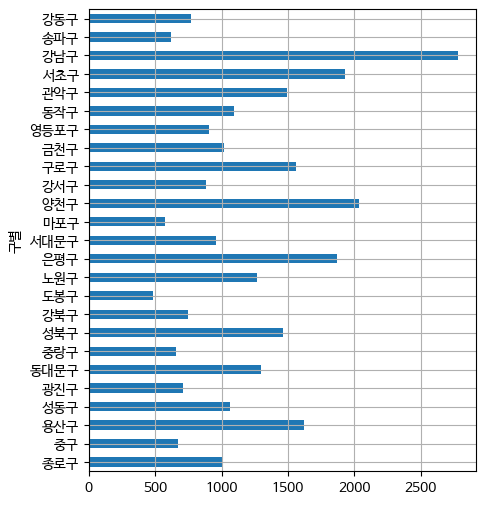

In [ ]:
# data_result['소계']를 barh형태로 plot 하자
import matplotlib.pyplot as plt

plt.figure()
data_result['CCTV대수'].plot(kind='barh', grid=True, figsize=(5,6))
plt.show()

<Axes: ylabel='구별'>

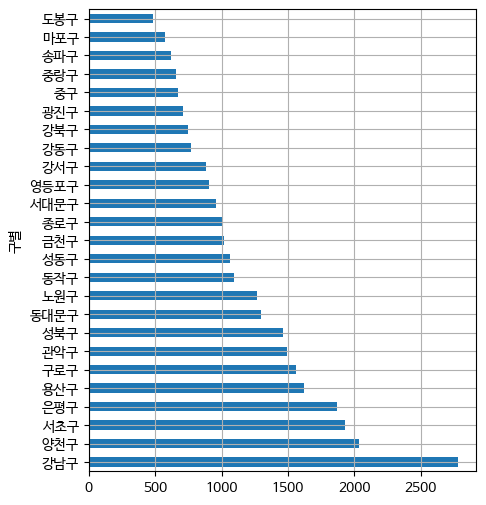

In [ ]:
# matplotlib으로 'CCTV대수'를 기준으로 가장 많은 구부터 출력
# sort_values를 data_result에 적용하고, 다음줄에서 plot
# 1. CCTV대수를 기준으로 정렬해야함

# 다음에서 사용되는 'plot()'은 maplotlib이 아니고 pandas에서 찾아봐야함
data_result.sort_values(by='CCTV대수', ascending=False, inplace=True)
data_result['CCTV대수'].plot(kind='barh', grid=True, figsize=(5,6))


<Axes: ylabel='구별'>

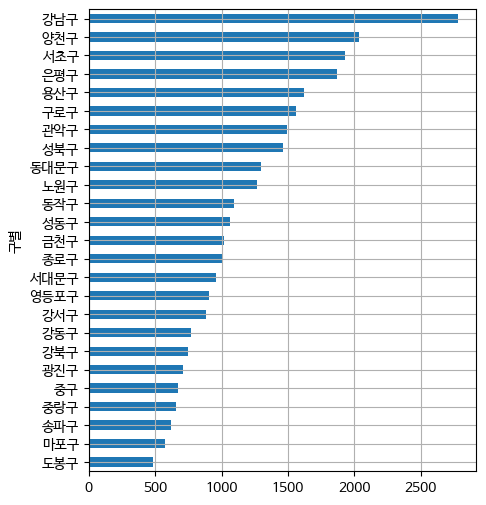

In [ ]:
# 정렬된 데이터를 바로 plot함수에 보내고 그래프를 바로 그림
data_result['CCTV대수'].sort_values(ascending=True).plot(kind='barh', grid=True, figsize=(5,6))

<ipython-input-80-fc87042dca93>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(data_result['인구수'][n]+10000, data_result['CCTV대수'][n]-25, data_result.index[n], fontsize=12)


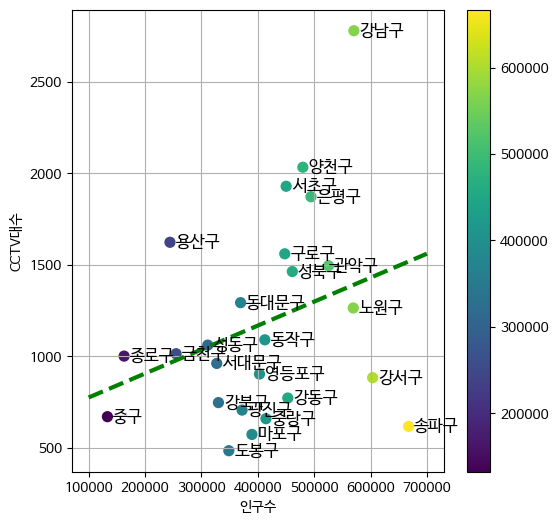

In [ ]:
# matplotlib으로 가로축은 '인구', 세로축은 'CCTV대수'인 scatter 그래프를 출력

#직선의방정식 (polyfit은 나중에 공부할것, 다른 대체함수 알려줄것임)
fp1 = np.polyfit(data_result['인구수'], data_result['CCTV대수'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['CCTV대수'], c=data_result['오차'],s=50)
plt.plot(fx,f1(fx), ls='--', lw=3, color='g')

for n in range(25):
  plt.text(data_result['인구수'][n]+10000, data_result['CCTV대수'][n]-25, data_result.index[n], fontsize=12)

temp = "Hello"
#plt.text(temp,2000,25)

plt.xlabel('인구수')
plt.ylabel('CCTV대수')
plt.colorbar()
plt.grid()
plt.show()